# Naive Bayes

## Libraries

In [134]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

## Load Data

In [135]:
# Load lines from mfeat-pix.txt
features = open('mfeat-pix.txt').readlines()

# Create labels for each line, 0-9 for each 200 lines
labels = []
for i in range(10):
  for j in range(200):
    labels.append(i)
labels = np.array(labels)

# Convert each line to a numpy array
for i in range(len(features)):
  features[i] = np.array(features[i].split()).astype('float')
  # Normalize
  features[i] = features[i] / 6
features = np.array(features)

## Plot

In [136]:
# fig, axs = plt.subplots(2, 5, figsize=(15, 6))
# for i in range(2):
#   for j in range(5):
#     axs[i, j].imshow(features[(5*i+j)*200], cmap='viridis', interpolation='nearest')
#     axs[i, j].set_title(labels[(5*i+j)*200])

## Split

In [137]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=40)

## Component Analysis

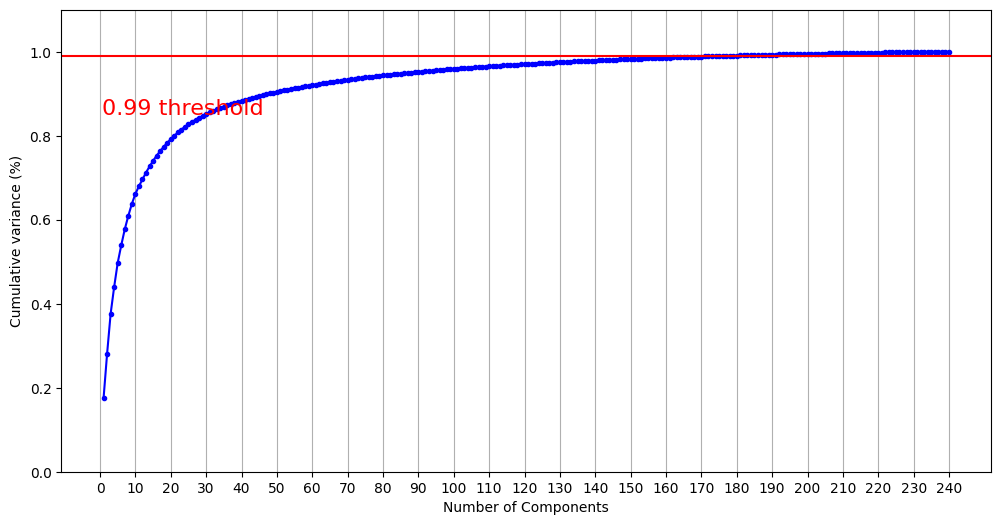

In [138]:
## Calculate n_components
pca = PCA(n_components = 0.99)
pca.fit(X_train)
reduced = pca.transform(X_train)

pca = PCA().fit(features)


plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 241, step=1)
yi = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, yi, marker='.', linestyle='-', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 241, step=10))
plt.ylabel('Cumulative variance (%)')

plt.axhline(y=0.99, color='r', linestyle='-')
plt.text(0.5, 0.85, '0.99 threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

## PCA

In [139]:
pca = PCA(n_components=180)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

## Model

In [140]:
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))
print("Error precentage: %d%%" % ((y_test != y_pred).sum() / X_test.shape[0] * 100))

Number of mislabeled points out of a total 400 points : 25
Error precentage: 6%
